Keyboard patterns database. 10 features. 4 classes.
8 batches of 200 instances



METHOD: Cluster and label as classifier and GMM with BIC and Mahalanobis as core support extraction
[2, 7, 10, 14, 18, 22, 26, 29, 34, 36, 43, 44, 49, 54, 58, 60, 64, 71, 73, 79, 83, 86, 91, 93, 97, 101, 107, 108, 115, 116, 123, 127, 131, 133, 136, 143, 144, 148]
[1, 4, 8, 15, 16, 23, 27, 30, 32, 37, 40, 47, 50, 53, 59, 62, 67, 70, 72, 78, 80, 85, 88, 92, 98, 102, 104, 111, 114, 119, 121, 124, 130, 132, 138, 141, 145]
[0, 5, 9, 13, 19, 20, 25, 31, 35, 39, 42, 45, 48, 55, 56, 63, 66, 69, 75, 77, 82, 87, 89, 95, 96, 100, 105, 110, 112, 117, 120, 126, 128, 134, 139, 142, 147]
[3, 6, 11, 12, 17, 21, 24, 28, 33, 38, 41, 46, 51, 52, 57, 61, 65, 68, 74, 76, 81, 84, 90, 94, 99, 103, 106, 109, 113, 118, 122, 125, 129, 135, 137, 140, 146, 149]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 66, 68, 69, 73, 82, 83, 89, 91, 95, 98, 99]
[11, 12, 14, 15, 19, 22, 27, 32, 35, 37, 39, 44, 46, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59

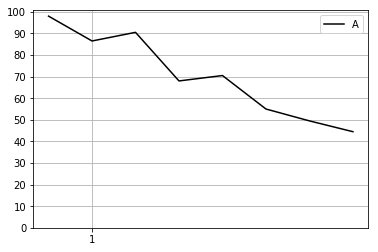

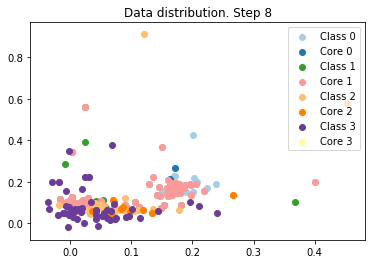




Boxplots from all methods


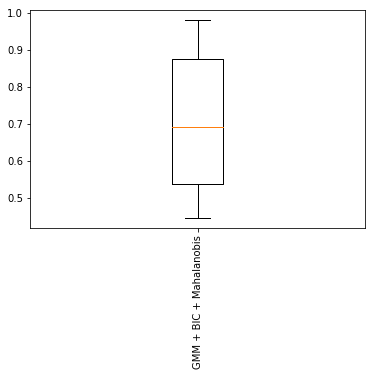

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[1])

from timeit import default_timer as timer
import numpy as np
import pandas as pd
import setup
from source import plotFunctions
from source import metrics
import checkerboard
from methods import compose_gmm_version

%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import Audio, display


class Experiment():
    def __init__(self, method):
        #commom for all experiments
        self.method = method
        self.initialLabeledDataPerc=0.75
        #self.classes=[0, 1]
        self.usePCA=False
        #used only by gmm and cluster-label process
        self.densityFunction='gmm'
        self.excludingPercentage = 0.95
        self.K_variation = 5
        self.classifier='cluster_and_label'
        #used in alpha-shape version only
        self.CP=0.65
        self.alpha=0.5
        #used in kmeans_svm and compose only
        self.useSVM=False
        self.isImbalanced=False


def doExperiments(dataValues, dataLabels, datasetDescription, experiments, numberOfTimes, batches):
    listOfAccuracies = []
    listOfMethods = []
    sizeOfBatch = int(len(dataLabels)/batches)
    
    print(datasetDescription)
    print("{} batches of {} instances".format(batches, sizeOfBatch))
    print("\n\n")
    
    for name, e in experiments.items():
        CoreX = []
        CoreY = []
        elapsedTime = []
        accTotal = []
        accuracies=[]
        classes = list(set(dataLabels))#getting all possible classes existent in data
        e.sizeOfBatch = sizeOfBatch
        e.batches = batches
        e.dataLabels = dataLabels
        e.dataValues = dataValues
        e.clfName = 'rf'

        for i in range(numberOfTimes):
            start = timer()
            #accuracy per step
            algorithmName, accuracies, CoreX, CoreY = e.method.start(dataValues=e.dataValues, dataLabels=e.dataLabels, usePCA=e.usePCA, classes=classes, classifier=e.classifier, densityFunction=e.densityFunction, batches=e.batches, sizeOfBatch = e.sizeOfBatch, initialLabeledDataPerc=e.initialLabeledDataPerc, excludingPercentage=e.excludingPercentage, K_variation=e.K_variation, CP=e.CP, alpha=e.alpha, clfName=e.clfName , useSVM=e.useSVM, isImbalanced=e.isImbalanced)
            end = timer()
            averageAccuracy = np.mean(accuracies)

            #elapsed time per step
            elapsedTime.append(end - start)
            
            accTotal.append(averageAccuracy)
        
        listOfAccuracies.append(accuracies)
        listOfMethods.append(algorithmName)
        #print("Total of ", numberOfTimes, " experiment iterations with an average accuracy of ", np.mean(accTotal))
        print("Average execution time: ", np.mean(elapsedTime))
        metrics.finalEvaluation(accuracies, batches)
        #print data distribution in step t
        initial = (batches*sizeOfBatch)-sizeOfBatch
        final = initial + sizeOfBatch
        plotFunctions.plot(dataValues[initial:final], dataLabels[initial:final], CoreX, CoreY, batches)
        print("\n\n")
   
    plotFunctions.plotBoxplot(listOfAccuracies, listOfMethods)
        

def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    #sinthetic
    '''dataValues, dataLabels, description = setup.loadCDT(path, sep)
    dataValues, dataLabels, description = setup.loadCHT(path, sep)
    dataValues, dataLabels, description = setup.load2CDT(path, sep)
    dataValues, dataLabels, description = setup.load2CHT(path, sep)
    dataValues, dataLabels, description = setup.loadUG_2C_2D(path, sep)
    dataValues, dataLabels, description = setup.loadUG_2C_3D(path, sep)
    dataValues, dataLabels, description = setup.loadUG_2C_5D(path, sep)
    dataValues, dataLabels, description = setup.loadMG_2C_2D(path, sep)
    dataValues, dataLabels, description = setup.loadFG_2C_2D(path, sep)
    dataValues, dataLabels, description = setup.loadGEARS_2C_2D(path, sep)
    dataValues, dataLabels, description = setup.loadCSurr(path, sep)
    dataValues, dataLabels, description = setup.load5CVT(path, sep)
    dataValues, dataLabels, description = setup.load4CR(path, sep)
    dataValues, dataLabels, description = setup.load4CRE_V1(path, sep)
    dataValues, dataLabels, description = setup.load4CRE_V2(path, sep)
    dataValues, dataLabels, description = setup.load4CE1CF(path, sep)
    #real
    dataValues, dataLabels, description = setup.loadCheckerBoard(path, sep)
    dataValues, dataLabels, description = setup.loadNOAADataset(path, sep)
    '''
    dataValues, dataLabels, description = setup.loadKeystroke(path, sep)
    '''dataValues, dataLabels, description = setup.loadElecData(path, sep)'''
    
    ''' COMPOSE (GMM extracting core supports) '''
    experiments[0] = Experiment(compose_gmm_version)
    
    '''
    #running pywidget
    def run(batches):
        doExperiments(dataValues, dataLabels, description, experiments, 1, batches)
        
    v = interact(run, batches=(1, 100, 1));
    display(v)
    '''
    #params: X, y, method, num of experiment repetitions, num of batches
    doExperiments(dataValues, dataLabels, description, experiments, 1, 8)
    
if __name__ == "__main__":
    main()